In [26]:
import pandas as pd
import os

### Merge data from each month into one CSV

In [31]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [34]:
files = [file for file in os.listdir("./Sales_Data")]

for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [36]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [39]:
all_data = pd.read_csv("all_data.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

### Drop rows of NAN

In [40]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data =all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Get rid of text in order date column

In [42]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Make columns correct type

In [44]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns

### Add month column

In [48]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add city column

In [49]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


# Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month?

In [50]:
all_data['Sales']= all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [51]:
all_data.groupby(['Month']).sum()

C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\2666040485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3623536.76,3644513.46
2,26898,4377769.44,4404044.84
3,34010,5582415.66,5614200.76
4,41116,6735342.04,6781340.48
5,37334,6270250.26,6305213.50
6,30506,5124051.22,5155604.52
7,32144,5265079.12,5295551.52
8,26896,4460690.84,4488935.76
9,26218,4169984.18,4195120.26


range(1, 13)


C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\1377575674.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])


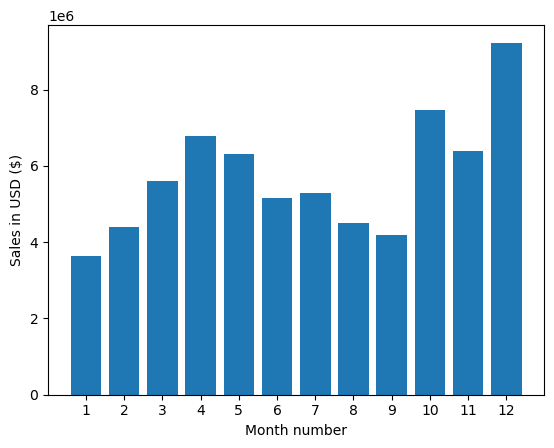

In [54]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [55]:
all_data.groupby(['City']).sum()

C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\4158429969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),33204,5559816.40,209588,5590997.16
Austin (TX),22306,3619747.22,139658,3639163.50
Boston (MA),45056,7274819.54,282224,7323284.02
Dallas (TX),33460,5505255.64,209240,5535950.80
Los Angeles (CA),66578,10842870.46,416650,10905141.60
New York City (NY),55864,9270741.66,351482,9328634.86
Portland (ME),5500,894378.50,34288,899516.54
Portland (OR),22606,3721116.44,141242,3741464.68
San Francisco (CA),100478,16422923.48,631040,16524407.82


C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\4203850427.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]
C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\4203850427.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])


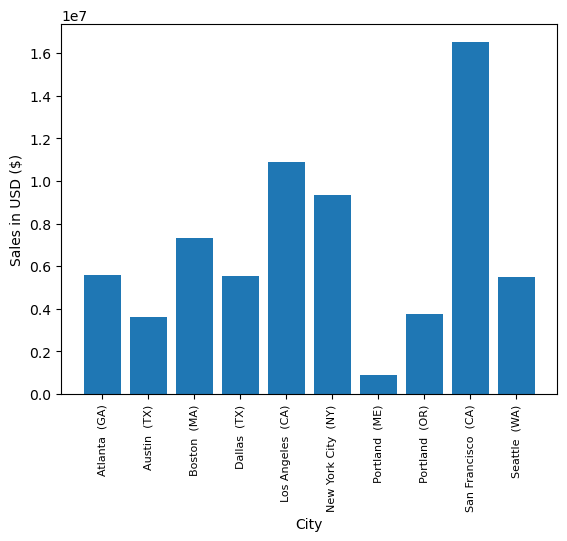

In [57]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?¶

In [59]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\1538527279.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


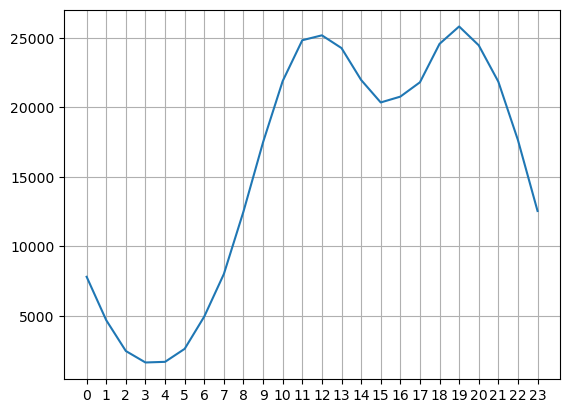

In [60]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 12noon or 7pm.

#### Question 4: What products are most often sold together?

#### https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

#### Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby


In [64]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID','Grouped']].drop_duplicates()

In [66]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


#### Question 5: What product sold the most? Why do you think it sold the most?

#### Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\1605481240.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


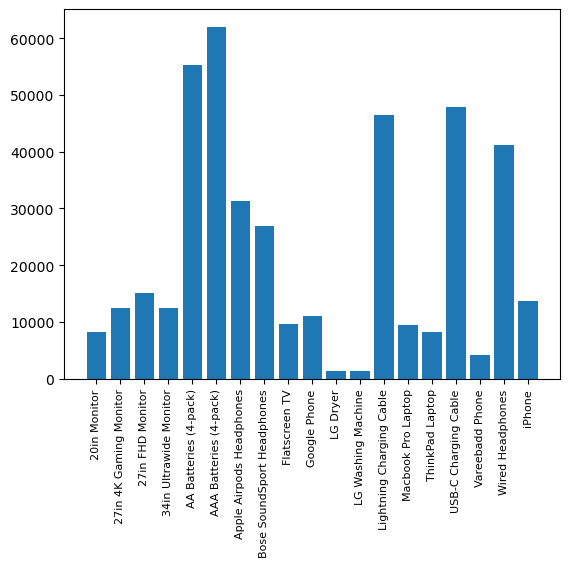

In [67]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\1624100743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\1624100743.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Paarvi\AppData\Local\Temp\ipykernel_9040\1624100743.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


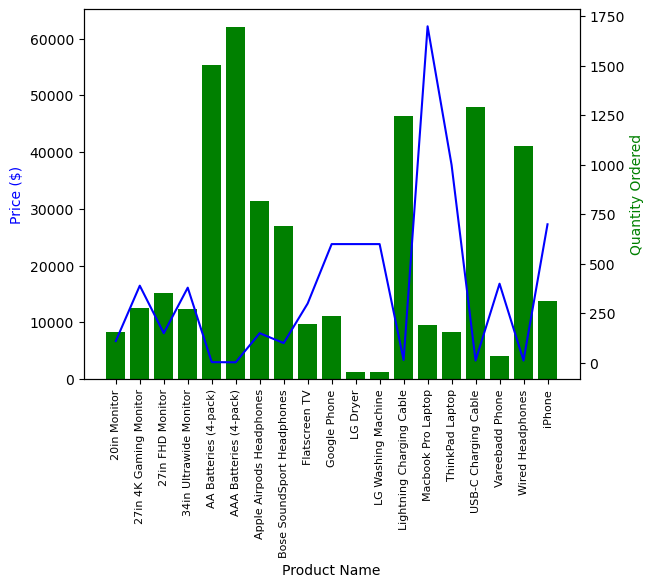

In [68]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax2.set_ylabel('Quantity Ordered', color='g')
ax1.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()